In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv("StudentsPerformance.csv")

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [ ]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [2]:
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [ ]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
# Check number of unique values per column
print(df.nunique())

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [ ]:
# Check how many duplicate rows exist
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [ ]:
# Check correlation between numerical columns
correlation = df[['math score', 'reading score', 'writing score']].corr()
print(correlation)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


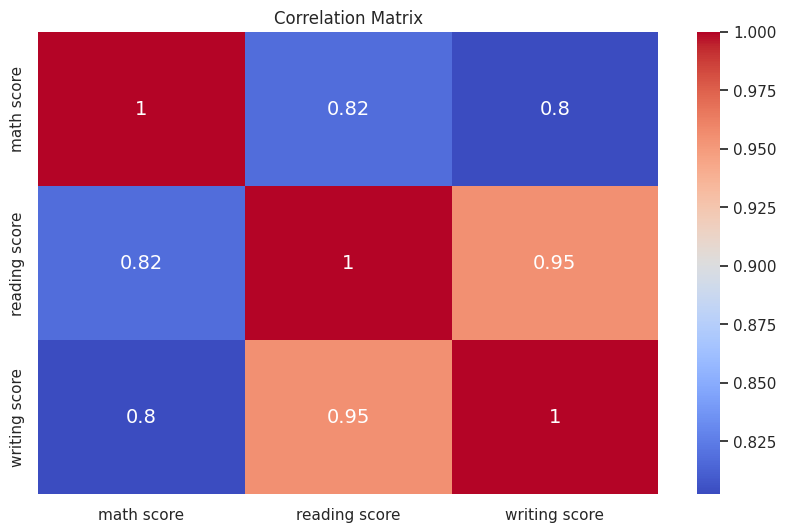

In [ ]:
# Plot heatmap for correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

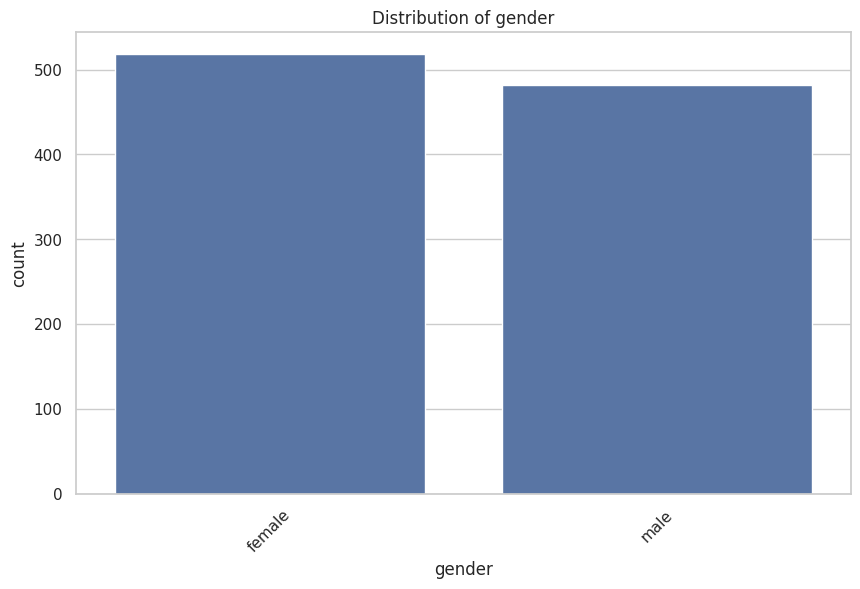

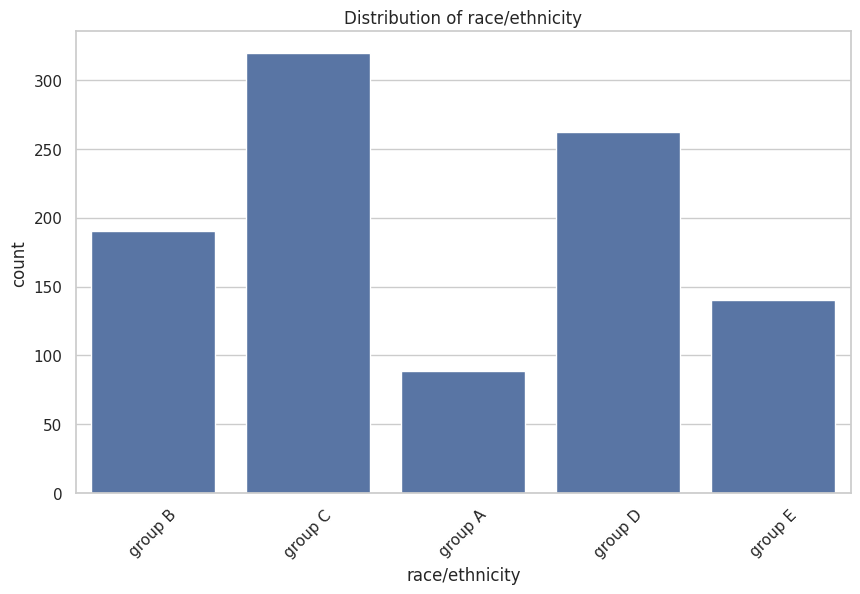

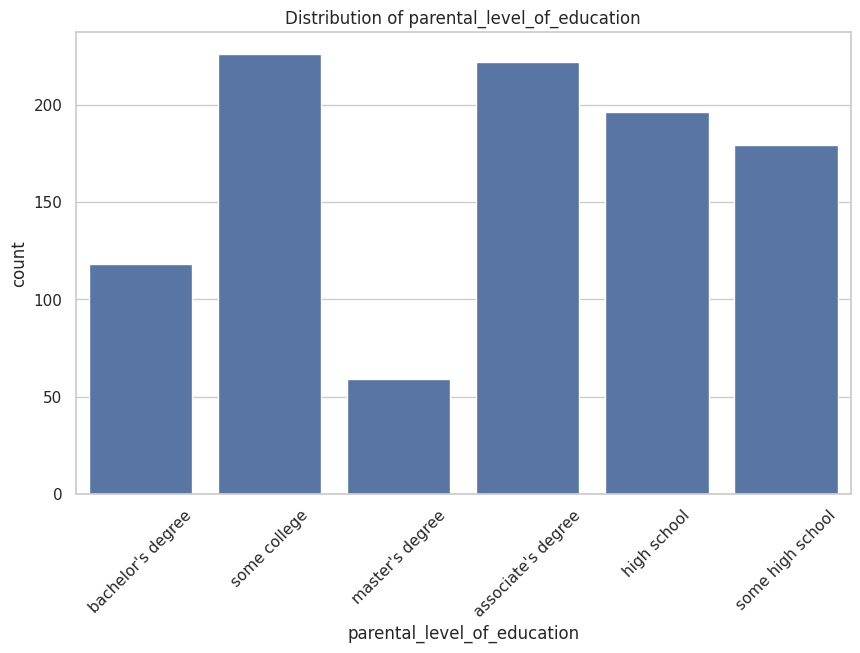

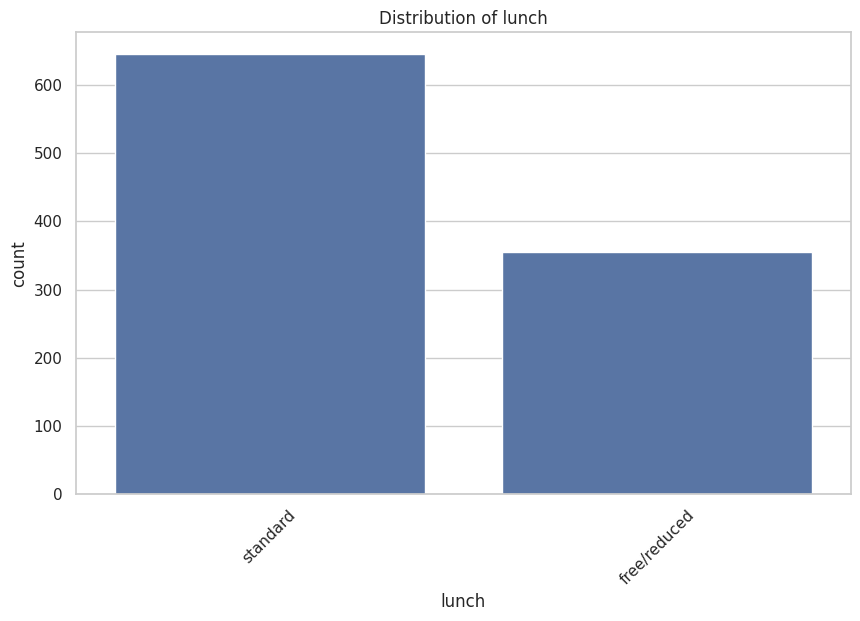

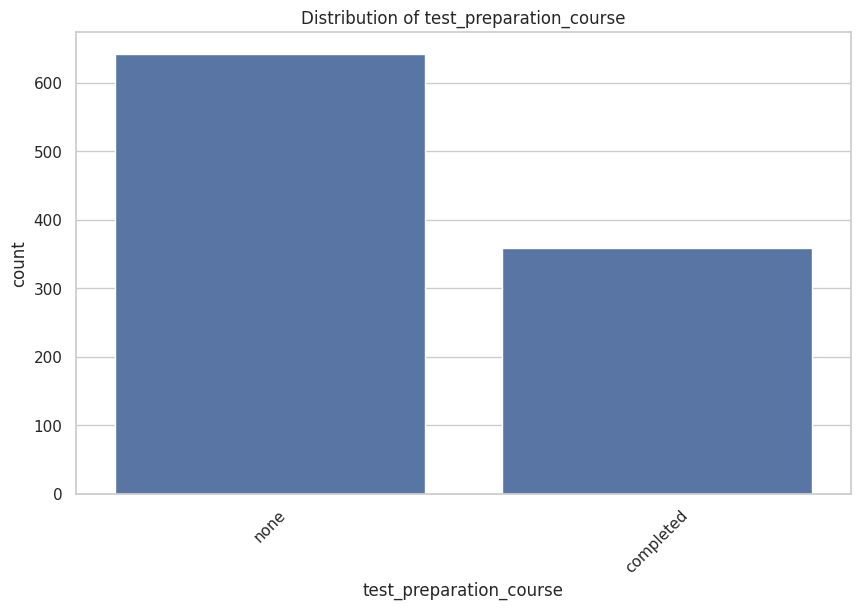

In [ ]:
# Count plot of categorical features
# Plot count of each category in categorical features.
# Helps visualize distribution and detect any imbalance or bias in the data.

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

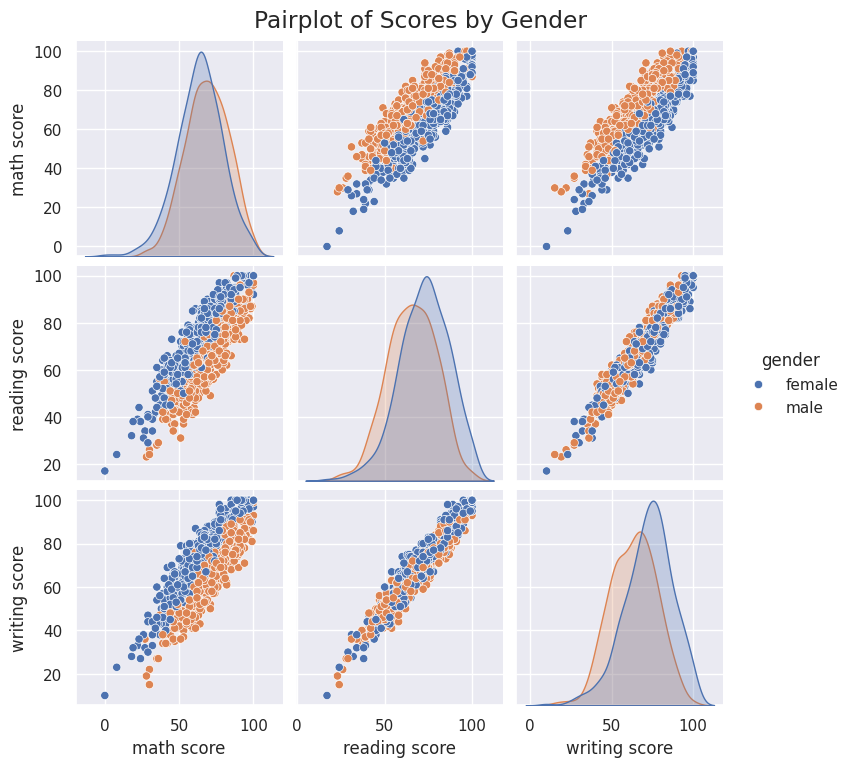

In [ ]:
# Pairplot to visualize relationships between scores
sns.pairplot(df, hue='gender', vars=['math score', 'reading score', 'writing score'])
plt.suptitle("Pairplot of Scores by Gender", y=1.02)
plt.show()

In [ ]:
# Encode categorical features using One Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

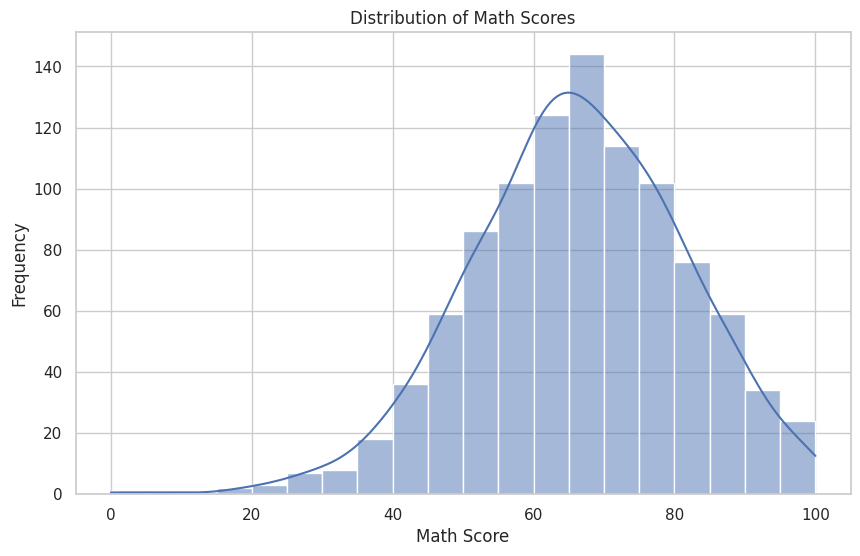

In [ ]:
#Distribution of Math Scores
sns.histplot(df['math score'], kde=True, bins=20)
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

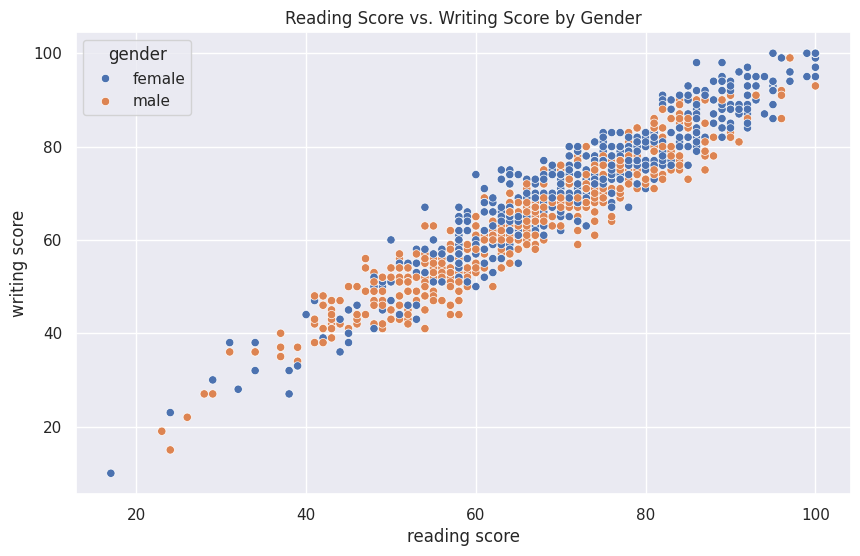

In [ ]:
# Ralation between Reading and Writing Score
sns.scatterplot(data=df, x='reading score', y='writing score', hue='gender')
plt.title("Reading Score vs. Writing Score by Gender")
plt.show()

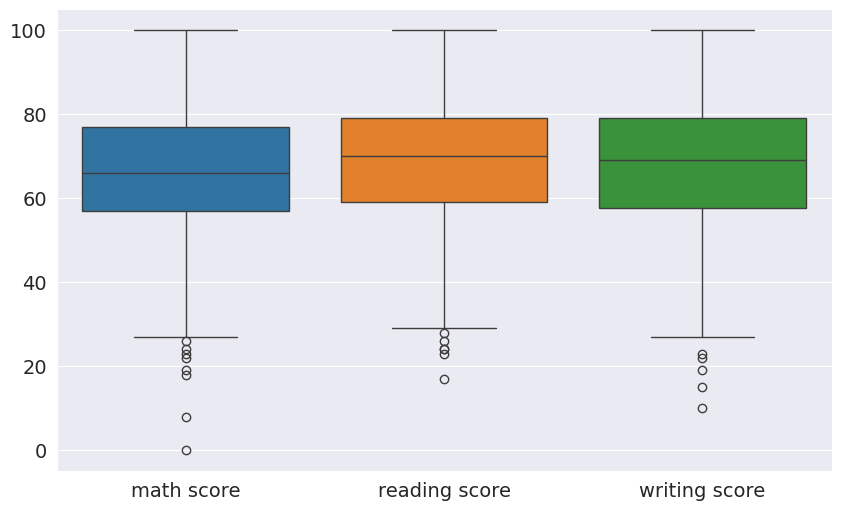

In [3]:
# Boxplot checking for outliers
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.boxplot(data=df)
plt.show()

In [ ]:
# Loop through each numeric column and remove rows with outliers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)   # First quartile
    Q3 = df[col].quantile(0.75)   # Third quartile
    IQR = Q3 - Q1                 # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers in this column
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed using IQR method")
print(f"Remaining rows: {df.shape[0]}")


Outliers removed using IQR method
Remaining rows: 986


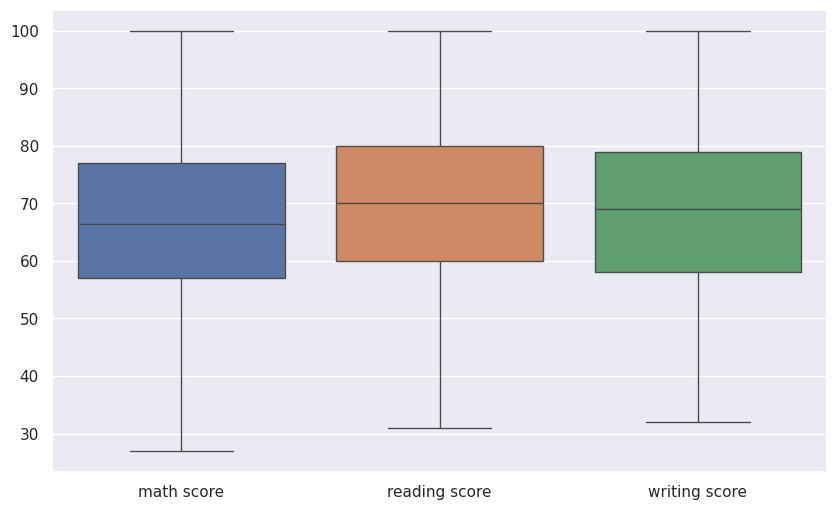

In [ ]:
# Boxplot Check that the outliers are removed
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.boxplot(data=df)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X): all columns except the target
X = df_encoded.drop('math score', axis=1)

# Target (y): the value we want to predict
y = df_encoded['math score']

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}, Testing shape: {X_test.shape}")


Training shape: (800, 14), Testing shape: (200, 14)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model and train it
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 29.10
Mean Absolute Error (MAE): 4.21
R² Score: 0.88


In [ ]:
# Get the accuracy of the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8804332983749565


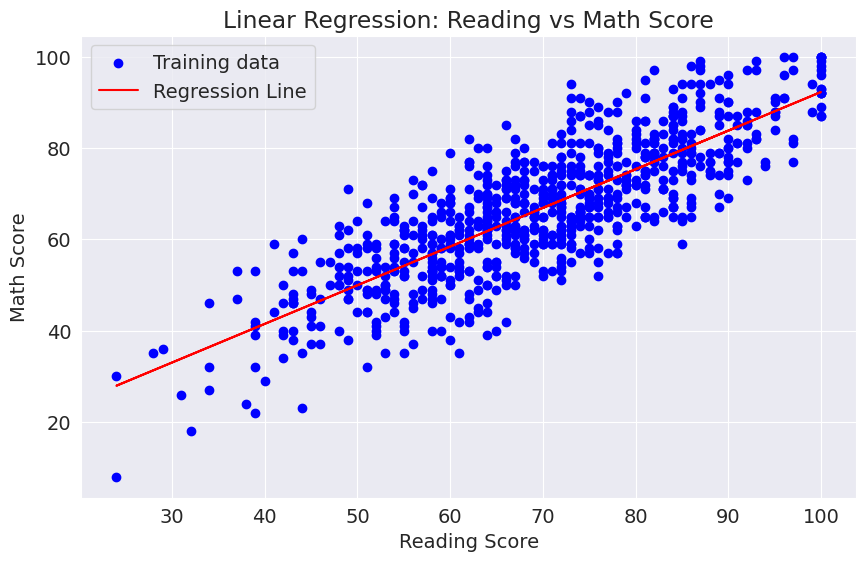

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.title("Linear Regression: Reading vs Math Score")
plt.legend()
plt.show()
